# Práctica guiada

## Predicción de enfermedad cardíaca con Random Forest

<img src="img/heart-health-tips-animation-thumbnail.gif" alt="hearth">


El hospital de León quiere **predecir riesgo de enfermedad cardíaca** a partir de datos clínicos básicos de pacientes.


El objetivo **no es solo entrenar un modelo**, sino **decidir qué modelo es más adecuado**, cómo configurarlo y **explicar por qué**.

Trabajarás con:

* `heart.csv` → dataset completo
* `heart_disease_4features.csv` → versión reducida y más interpretable

El cuaderno base utiliza **Random Forest**, búsqueda de hiperparámetros y visualización de árboles .

---

## Resultados de aprendizaje trabajados

* **RA2.c** Define el modelo a implementar
* **RA2.d** Implementa la aplicación
* **RA2.e** Evalúa resultados

---

## Entrega

Un **notebook Jupyter** en formato PDF con:

* Código funcional
* Respuestas razonadas en Markdown
* Gráficas y métricas
* Conclusiones claras

---

## ¿Qué es Random Forest?

**Random Forest** es un algoritmo de **aprendizaje automático supervisado** que se utiliza tanto para **clasificación** como para **regresión**.

La idea principal es sencilla:

> En lugar de tomar una decisión con un solo árbol de decisión, Random Forest entrena **muchos árboles distintos** y combina sus resultados para obtener una predicción más fiable.

---

## ¿Cómo funciona?

1. Se crean **muchos subconjuntos distintos** del conjunto de entrenamiento (muestreo con reemplazo).
2. Con cada subconjunto se entrena **un árbol de decisión diferente**.
3. En cada árbol, las divisiones se hacen usando **solo una parte aleatoria de las variables**.
4. Para clasificar un nuevo dato:

   * Cada árbol da su predicción.
   * El modelo final decide por **votación mayoritaria**.

Este proceso reduce los errores debidos a:

* árboles demasiado complejos
* datos ruidosos
* sobreajuste al conjunto de entrenamiento

<img src="img/random-forest.png" alt="random forest">

---

## ¿Por qué no usar un solo árbol de decisión?

Un árbol de decisión:

* es fácil de entender
* pero **muy sensible a los datos**
* puede memorizar el entrenamiento (overfitting)

Random Forest soluciona esto porque:

* combina muchos árboles simples
* promedia sus decisiones
* generaliza mejor a datos nuevos

---

## Ventajas de Random Forest

* Funciona bien con **datos tabulares**
* No necesita normalización de variables
* Captura relaciones **no lineales**
* Es robusto frente al ruido
* Permite estimar la **importancia de las variables**

Por eso es muy utilizado en:

* medicina
* banca
* detección de fraude
* problemas reales con datos estructurados

---

## Inconvenientes

* Es menos interpretable que un solo árbol
* Consume más tiempo y recursos
* No es ideal cuando se necesita un modelo muy simple o explicable al 100%

Más información

[Machine Learning Google](https://developers.google.com/machine-learning/decision-forests?hl=es-419)

[Videotutorial: Random Forests con Python](https://www.youtube.com/watch?v=VfMPslt2wgA)

---

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score
)

## Parte 1 – Exploración y comprensión del dataset (obligatoria)

### 1.1 Carga de datos

Carga ambos datasets y responde:

In [2]:
import pandas as pd

df = pd.read_csv("./heart.csv")
dfs = pd.read_csv("./heart_disease_4features.csv")

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<div style="background-color:green;color:white">

<br>

**Cuestiones (responde en Markdown):**

* ¿Cuántas variables tiene cada dataset?


* ¿Cuál crees que será más fácil de explicar a un médico?


* ¿Qué se pierde al reducir variables?


<br>

- El DataSet completo tiene 14 mientras que el reducido solo cuenta con 6
- Será mas facil de explicar el csv reducido ya que al haber menos variables es mucho mas facil de comprender
- Se pueden perder ciertas coorrelaciones entre datos que afecten mas o menos al resultado final 

---

### 1.2 Variable objetivo

<div style="background-color:green;color:white">

<br>

* Identifica claramente la variable *objetivo*

* Explica qué significa *0* y *1*


* Comprueba si hay **desbalanceo de clases**


 <br>

In [3]:
y = df["target"]
x = df.drop("target", axis=1)

# El 0 significa que no tiene riesgo de sufrir enfermedades del corazon mientras que el 1 si que tienen riesgo de sufrirlas

df["target"].value_counts() #No hay desvalanceo de clases ya que estan bastante igualados las dos opciones

target
1    526
0    499
Name: count, dtype: int64

## Parte 2 – Primer modelo Random Forest (baseline)

### 2.1 Separación train/test

Usa `train_test_split` con:

* `test_size=0.2`
* `random_state=42`



In [4]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

<div style="background-color:green;color:white">

<br>

Explica **por qué fijar la semilla es importante**.


<br>

- Es importante por que asi coje datos de forma aleatoria para que no todos sean datos de gente que no tiene probabilidad de tener enfermedades del corazon

---

### 2.2 Entrenamiento inicial

Entrena un **Random Forest controlado**, es decir, **no utilices el modelo con los valores por defecto**.

Para ello:

* Crea un `RandomForestClassifier` fijando **explícitamente varios hiperparámetros**.
* Debes **limitar la complejidad del modelo** para evitar sobreajuste.
* Asegura que el entrenamiento sea **reproducible**.
* Evita que el modelo tome decisiones basadas en **muy pocos ejemplos**.
* (Opcional) Activa una estimación interna del rendimiento.

El modelo debe entrenarse con los datos de entrenamiento (`X_train`, `y_train`).

📌 **Ayuda**
Consulta la documentación oficial de [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) en *scikit-learn* para identificar qué hiperparámetros permiten:

* controlar la profundidad de los árboles,
* fijar el número de árboles,
* imponer un tamaño mínimo en las hojas,
* y garantizar reproducibilidad.




In [5]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, min_samples_split=10)

rfc.fit(train_x, train_y)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

---
## Parte 3 – Evaluación correcta del modelo

Una vez entrenado el modelo, es necesario **evaluar su rendimiento** para comprobar si es capaz de **generalizar correctamente** a datos que no ha visto durante el entrenamiento.

En esta parte no basta con obtener una predicción: se deben analizar **distintas métricas**, ya que cada una aporta información diferente sobre el comportamiento del modelo.

---

### Qué se va a hacer

Se evaluará el modelo utilizando el conjunto de test y se mostrarán:

* **Accuracy**
* **Matriz de confusión**
* **Informe de clasificación (classification report)**

Estas métricas permiten analizar no solo cuántas predicciones acierta el modelo, sino **qué tipo de errores comete**.

---

### Por qué no es suficiente una sola métrica

En problemas de clasificación, especialmente en contextos reales como la medicina, **no todos los errores tienen el mismo impacto**.
Por ejemplo, clasificar como sano a un paciente enfermo puede ser mucho más grave que el error contrario.

Por ello, es imprescindible analizar varias métricas y no quedarse solo con la accuracy.

---

- Accuracy: Indica el **porcentaje total de predicciones correctas**.


- Matriz de confusión: Muestra el **número de aciertos y errores por clase**, permite ver **qué tipo de errores son más frecuentes**.

- Classification report: Resume varias métricas clave para cada clase:

* **Precision**: de las predicciones positivas, cuántas son correctas.
* **Recall (sensibilidad)**: de los casos reales, cuántos detecta el modelo.
* **F1-score**: equilibrio entre precision y recall.

---




In [6]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report

y_pred = rfc.predict(test_x)

recall = recall_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
ac = accuracy_score(test_y, y_pred)
cm = confusion_matrix(test_y, y_pred)
cr = classification_report(test_y, y_pred)

print("Recall: ", recall)
print("Precision: ", precision) 
print("F1: ", f1)
print("Accuracy: ", ac)
print("Matriz de confusion: \n", cm)
print("Reporte de clasificacion: \n", cr)

Recall:  0.9320388349514563
Precision:  0.8571428571428571
F1:  0.8930232558139535
Accuracy:  0.8878048780487805
Matriz de confusion: 
 [[86 16]
 [ 7 96]]
Reporte de clasificacion: 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       102
           1       0.86      0.93      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



<div style="background-color:green;color:white">

<br>


- ¿El rendimiento del modelo es adecuado?
- ¿Qué clase se predice mejor y cuál peor?
- ¿Qué tipo de error consideras más problemático en este contexto y por qué?
- ¿Es suficiente la accuracy en un problema médico?
- Justifica con un ejemplo concreto.


<br>

- El rendimiento del modelo es adecuado, no parece tener sobreajuste
- La clase que peor predice es la 1
- Los errores que mas penalizan en este caso serian los falsos negativo ya que habria gente que se iria a casa sin tratamiento pensando que estan bien sin estarlo realmente
- No es suficiente accuracy por que deberia ser mas precisos en estos casos que resultan tan importantes y hay demasiado falsos positivos y negativos


---

## Parte 4 – Optimización con GridSearchCV

En esta parte se va a **optimizar el modelo Random Forest entrenado anteriormente** utilizando **validación cruzada**.

En lugar de fijar los hiperparámetros manualmente, se utilizará `GridSearchCV` para **probar distintas combinaciones** de valores y seleccionar automáticamente la que **mejor rendimiento medio** obtenga en validación cruzada.

Se repetirá la **misma estrategia utilizada en el cuaderno base**:

* Se variará la **profundidad máxima de los árboles**.
* Se limitará el **número mínimo de muestras por hoja** para evitar decisiones basadas en pocos datos.
* Se probarán distintos **números de árboles** en el bosque.
* El rendimiento se evaluará mediante **accuracy** y validación cruzada.

El objetivo **no es solo mejorar la métrica**, sino **comparar el modelo optimizado con el modelo controlado anterior** y reflexionar sobre el coste computacional.

---


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "max_depth": [2, 3, 5, 10, 20],
    "min_samples_leaf": [5, 10, 20, 50, 100],
    "n_estimators": [10, 30, 50, 100]
}

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)
grid = GridSearchCV(rf, param_grid, cv=5)
grid.fit(train_x, train_y)

print(grid.best_params_)
p = grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}


In [ ]:
rfc = RandomForestClassifier(max_depth=p["max_depth"], min_samples_leaf=p["min_samples_leaf"], n_estimators=p["n_estimators"])

rfc.fit(train_x, train_y)

y_pred = rfc.predict(test_x)

recall = recall_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
ac = accuracy_score(test_y, y_pred)
cm = confusion_matrix(test_y, y_pred)
cr = classification_report(test_y, y_pred)

print("Recall: ", recall)
print("Precision: ", precision) 
print("F1: ", f1)
print("Accuracy: ", ac)
print("Matriz de confusion: \n", cm)
print("Reporte de clasificacion: \n", cr)

Recall:  0.9223300970873787
Precision:  0.8715596330275229
F1:  0.8962264150943396
Accuracy:  0.8926829268292683
Matriz de confusion: 
 [[88 14]
 [ 8 95]]
Reporte de clasificacion: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       102
           1       0.87      0.92      0.90       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



A partir del modelo y del conjunto de hiperparámetros definidos anteriormente, configura un proceso de **búsqueda exhaustiva** de hiperparámetros utilizando `GridSearchCV`.

El proceso debe cumplir las siguientes condiciones:

* Utiliza como **estimador** el modelo `RandomForestClassifier` previamente definido.
* Emplea el conjunto de hiperparámetros almacenado en `param_grid`.
* Aplica **validación cruzada** con un número fijo de particiones.
* Evalúa el rendimiento usando una **métrica de clasificación adecuada**.
* Aprovecha todos los núcleos disponibles del sistema.
* Muestra información detallada del proceso de búsqueda.

Al finalizar:

* Identifica los **mejores hiperparámetros** encontrados.
* Recupera el **mejor modelo** entrenado.
* Evalúa dicho modelo sobre el conjunto de test.

📌 **Ayuda**
Consulta la documentación oficial de [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) que permiten


* indicar el estimador,
* definir la rejilla de parámetros,
* establecer el número de particiones de la validación cruzada,
* seleccionar la métrica de evaluación,
* activar el uso de múltiples núcleos,
* y mostrar el progreso del entrenamiento.




<div style="background-color:green;color:white">

<br>

- ¿Qué combinación obtiene mejor resultado?


- ¿Ha mejorado realmente frente al modelo inicial?


- ¿Cuánto tiempo tarda y por qué?



<br>

- La mejor convinación de parametros es:
    ```{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}```
- Si que ha mejorado algo, ha subido u poco el accuracy y la precisión mientras que los demas parametros se han mantenido muy similares
- Tarda mucho tiempo en probar todas las combinaciones por que tiene que probar todas y son muchas epocas en total

---

## Parte 5 – Interpretabilidad: dentro del bosque 

### 5.1 Visualización de un árbol

En esta parte se va a **analizar el interior del modelo Random Forest** para comprender **cómo toma decisiones**.

Un Random Forest está formado por **muchos árboles de decisión**. El modelo final no se basa en uno solo, sino en la **combinación de todos ellos**.
Sin embargo, para entender el funcionamiento interno del modelo, es útil **visualizar uno de esos árboles individuales**.

El objetivo **no es explicar el modelo completo**, sino:

* observar **qué variables utiliza**,
* entender **qué tipo de reglas aprende**,
* y reflexionar sobre **las limitaciones de la interpretabilidad** en modelos de conjunto.


---

### Pistas para la implementación

* Un `RandomForestClassifier` almacena los árboles entrenados en un **atributo interno**.
* Cada árbol puede visualizarse usando una función específica de `sklearn.tree`.
* Es recomendable:

  * fijar el tamaño de la figura,
  * limitar la profundidad del árbol representado,
  * mostrar los nombres de las variables,
  * y colorear los nodos para facilitar la interpretación.

📌 **Ayuda**
Consulta la documentación de:

* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) para localizar dónde se almacenan los árboles entrenados.
* [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) para identificar los parámetros que controlan la visualización, los nombres de las variables y la profundidad máxima.



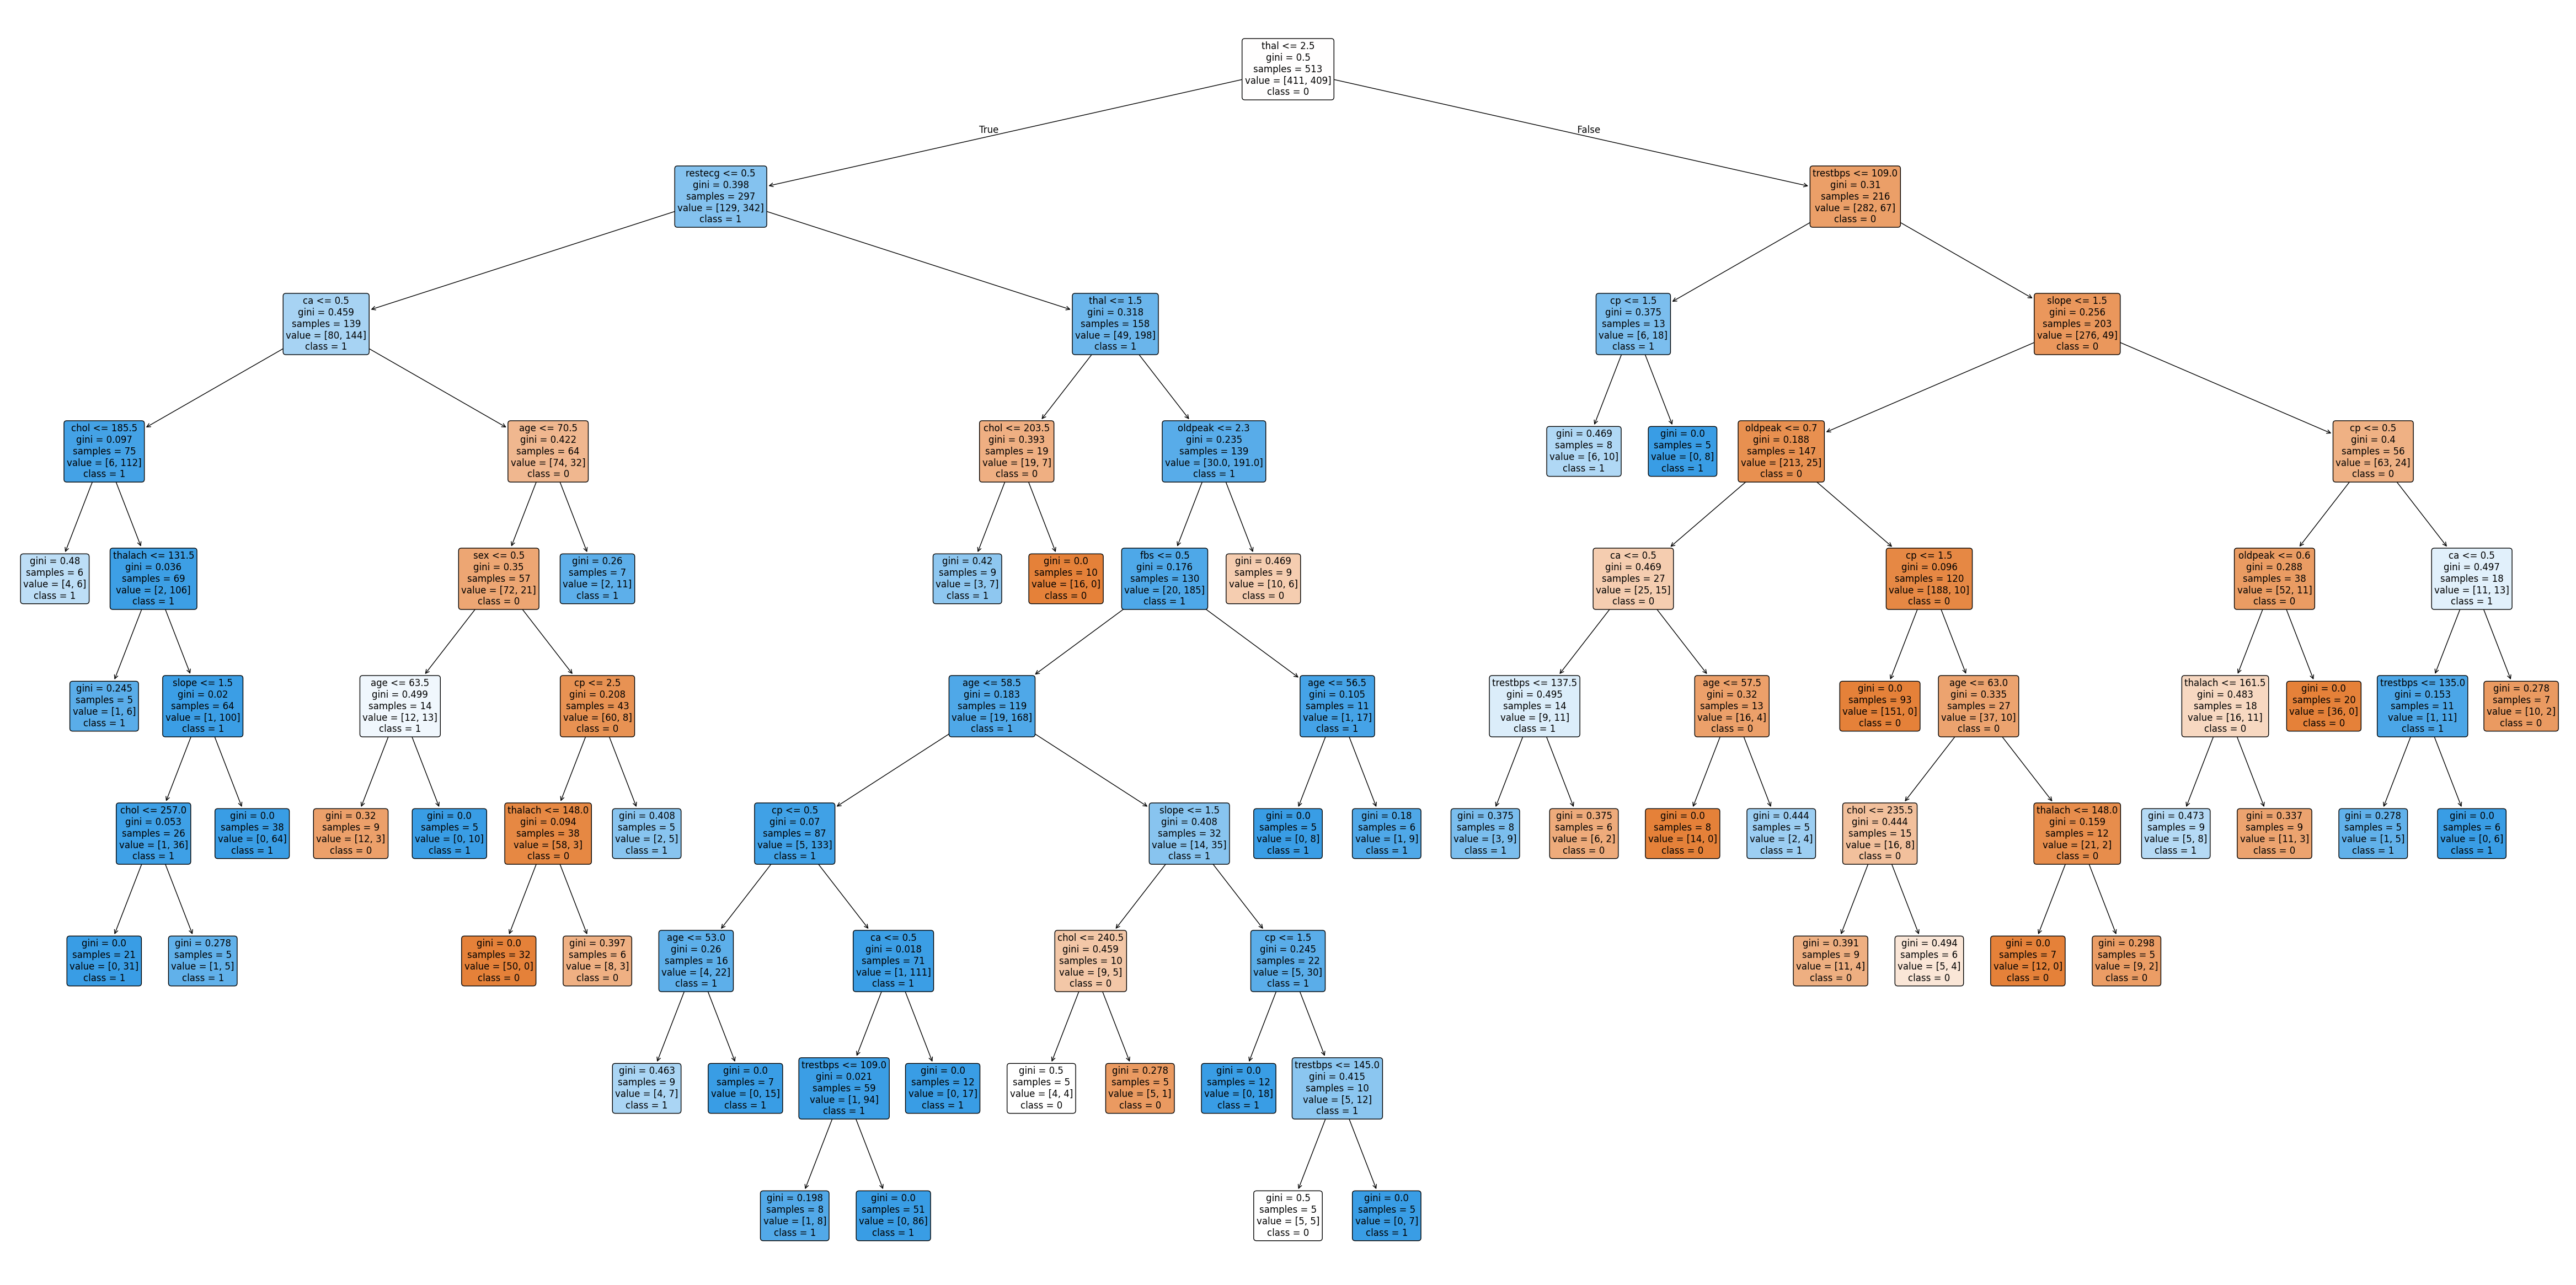

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(60, 30))

plot_tree(rfc.estimators_[0], 
          feature_names=x.columns, 
          class_names=[str(c) for c in rfc.classes_], 
          filled=True,
          max_depth=None,
          rounded=True,
          fontsize=12)
plt.show()

<div style="background-color:green;color:white">

<br>

**Explica:**

* Qué variable aparece primero


* Qué significa una condición tipo *chol <= 240*


* Por qué **no debemos mostrar este árbol a un médico como modelo final**


<br>

- La primera variable es Thal, la que mas influencia tiene en la decisión final
- El modelo ha estudiado los datos y ha encontrado que 240 es el punto de corte que mejor separa a unos pacientes de otros
- No se debe mostrar por que un solo arbol del bosque puede ser muy sensible a cambios de los datos y puede presenatr sobreajuste y sesgos 

---

### 5.2 Importancia de variables

En este apartado se va a analizar **qué variables son más importantes para el modelo Random Forest** a la hora de realizar sus predicciones.

Un Random Forest toma decisiones combinando muchos árboles de decisión. En cada árbol, las variables no se usan todas por igual: algunas aparecen con más frecuencia y generan **mejores divisiones** que reducen más la incertidumbre del modelo.
A partir de esta información, el modelo puede estimar la **importancia relativa de cada variable**.

---


#### Pistas para la implementación

* Los modelos `RandomForestClassifier` calculan automáticamente la importancia de las variables tras el entrenamiento.
* Esta información se encuentra en un **atributo del modelo**.
* Para interpretarla correctamente:

  * es conveniente asociar cada valor con el nombre de su variable,
  * y ordenar los resultados para facilitar el análisis.

📌 **Ayuda**
Consulta la documentación de `RandomForestClassifier` para identificar el atributo que almacena la importancia de las variables y su significado.


In [23]:
dfCoef = pd.DataFrame(rfc.feature_importances_, index=x.columns, columns=["Importancia"])
dfCoef = dfCoef.sort_values("Importancia", ascending=False)
dfCoef

,Importancia
ca,0.160232
thal,0.158615
cp,0.137039
thalach,0.118225
oldpeak,0.115282
age,0.058818
chol,0.058538
exang,0.055477
trestbps,0.049614
slope,0.045212


<div style="background-color:green;color:white">

<br>

- ¿Coincide con lo que esperarías médicamente?

- ¿Qué variable eliminarías si quisieras simplificar aún más?

<br>

- NO coincide por que pensaba que la que mas influia era el thal y ha resultado ser el ca
- Pues eliminaria todas a partir de la edad ya qu eno llegan ni a un 0.1 sobre 1 de coeficiente por lo que representan muy poco 

--

## Parte 6 – Comparación crítica de datasets

Entrena **el mismo modelo** con:

* dataset completo
* dataset de 4 variables


---

In [29]:
ys = dfs["target"]
xs = dfs.drop("target", axis=1)

train_xs, test_xs, train_ys, test_ys = train_test_split(xs, ys, test_size=0.2, random_state=42)

rfc.fit(train_xs, train_ys)

y_preds = rfc.predict(test_xs)

recall = recall_score(test_ys, y_preds)
precision = precision_score(test_ys, y_preds)
f1 = f1_score(test_ys, y_preds)
ac = accuracy_score(test_y, y_preds)
cm = confusion_matrix(test_ys, y_preds)
cr = classification_report(test_ys, y_preds)

print("Recall: ", recall)
print("Precision: ", precision) 
print("F1: ", f1)
print("Accuracy: ", ac)
print("Matriz de confusion: \n", cm)
print("Reporte de clasificacion: \n", cr)


Recall:  0.8543689320388349
Precision:  0.7652173913043478
F1:  0.8073394495412844
Accuracy:  0.7951219512195122
Matriz de confusion: 
 [[75 27]
 [15 88]]
Reporte de clasificacion: 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       102
           1       0.77      0.85      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



<div style="background-color:green;color:white">

<br>

Completa una tabla como esta:

| Dataset | Accuracy | Interpretabilidad | Riesgo de overfitting |
| ------- | -------- | ----------------- | --------------------- |
| Completo | 0.89 | Menor por que entran mas variables en juego y es mas dificil de comprender a simple vista | Alta si los arboles son muy profundos  |
| 4 variables | 0.79 | Es mayor devido a menos variables | Baja por que se generaliza mejor|

<br>



<div style="background-color:green;color:white">

<br>

¿Qué modelo recomendarías *en un hospital pequeño* y por qué?


<br>

- Recomendaria el modelo podado con el GridSearchCV con el df de 4 variables por que es mucho mas interpretable y tiene menos riesgo de overfiting aunque hay bastantes falsos negativos

---

## Parte 7 – Reflexión final

Responde brevemente (5–6 líneas cada una):

<div style="background-color:green;color:white">

<br>

1. ¿Por qué Random Forest es una buena elección aquí?

2. ¿Cuándo **no** usarías Random Forest?


3. ¿Qué mejorarías si tuvieras más datos?


<br>


- Es buena eleccion por que es bastante robusto a los rudios por la cantidad de arboles que se usan, tambien es bastante interpretable (dependiendo de la cantidad de variables) y permite identificar rapidamente cual de la variables son las mas importantes 
- No usaria el Random Fores cuando no necesite interpretar los datos de forma instatanea o tenga unos recursos escasos ya que ha tardado bastante en ser entrenado por la cantidad de arboles usados. Si tubiera pocos datos tampoco lo usaria por que puede haber overfiting
- Si tuvieramos mas datos se podria hacer una busqueda mas profunda y ajustar mucho mejor los hyperparametros y se reducirian los falsos negativos